In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving churn-bigml-20.csv to churn-bigml-20.csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['churn-bigml-20.csv']))
print(df.shape)
print(df['Churn'])
print(df)

(667, 20)
0      False
1       True
2       True
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Name: Churn, Length: 667, dtype: bool
    State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No    

**Overall minutes - daytime wise, night time wise and international :**

In [ ]:
day_minutes=df['Total day minutes'].sum()
eve_minutes=df['Total eve minutes'].sum()
night_minutes=df['Total night minutes'].sum()
intl_minutes=df['Total intl minutes'].sum()
print("Total day minutes:", day_minutes)
print("Total Evening minutes:", eve_minutes)
print("Total Night minutes:", night_minutes)
print("Total International minutes:", intl_minutes)


Total day minutes: 120692.4
Total Evening minutes: 135638.0
Total Night minutes: 133190.1
Total International minutes: 6829.0


The customer call traffic is more during evenings and night rather than during the day.

**Correlation between customer service and churn**

In [ ]:
correlation = df['Customer service calls'].corr(df['Churn'])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.23325911144938058


The correlation between number of customer service calls and churn is 0.23 which says that there is a weak correlation between the number of customer service calls and the customer churn. This can mean that a dissatisfied customer makes many calls to the customer service before moving away. This means that we need to give more offers to retain customers.

**Correlation between the charges for customer during day, evening and night and churn :**

In [ ]:
correlation1 = df['Total day charge'].corr(df['Churn'])
correlation2 = df['Total eve charge'].corr(df['Churn'])
correlation3 = df['Total night charge'].corr(df['Churn'])
correlation4 = df['Total intl charge'].corr(df['Churn'])
print("Correlation coefficient day:", correlation1)
print("Correlation coefficient eve:", correlation2)
print("Correlation coefficient night:", correlation3)
print("Correlation coefficient intl :", correlation4)

Correlation coefficient day: 0.2427765147796451
Correlation coefficient eve: 0.1756163629744495
Correlation coefficient night: 0.04295837861150661
Correlation coefficient intl : -0.003680650536757359


Based on these correlation metrics, we can say that the day and evening charges have a weak correlation with the customer churn, while night and international charges have almost zero relation with the churn. We can say that our night and international rates are competitive and hence the customers are satisfied with the night and international rates as compared to day and evening rates, which we may need to decrease.

**Correleation heatmap**

<ipython-input-13-cc4ee6939ff4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

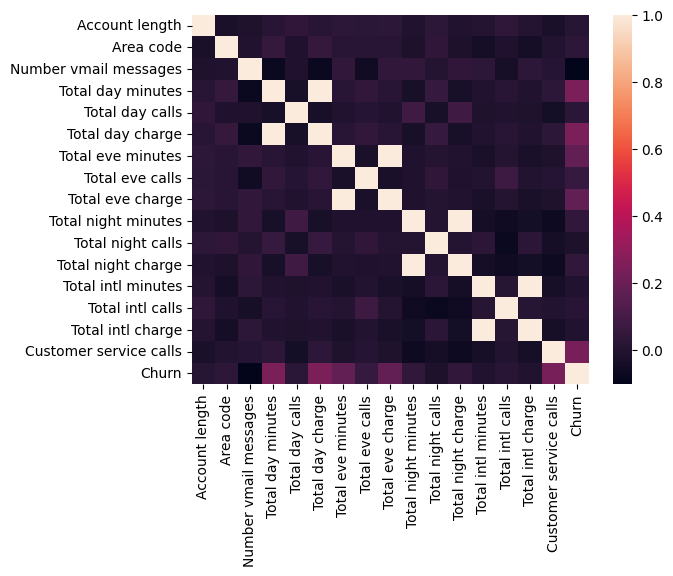

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns )

This heatmap shows that the Churn depends majorly on the day and eve charge and the customer service calls. 